## Titanic Portfolio Project: Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(7.0, 0.0)

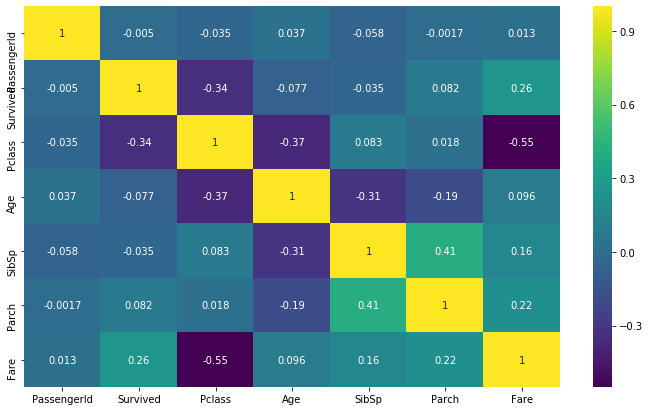

In [33]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(df.corr(),annot=True,cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [17]:
df.select_dtypes(['object']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [10]:
df.drop('Name',axis=1,inplace=True)

In [12]:
df.drop('Ticket',axis=1,inplace=True)

In [15]:
df['Cabin'].isnull().sum()

687

In [16]:
df.drop('Cabin',axis=1,inplace=True)

In [21]:
dummies = pd.get_dummies(df['Sex'],drop_first=True)

In [22]:
dummies

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
pd.concat([df,dummies],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1
887,888,1,1,female,19.0,0,0,30.0000,S,0
888,889,0,3,female,NaN,1,2,23.4500,S,0
889,890,1,1,male,26.0,0,0,30.0000,C,1


In [25]:
df.drop('Sex',axis=1,inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,2,1,1,38.0,1,0,71.2833,C
2,3,1,3,26.0,0,0,7.9250,S
3,4,1,1,35.0,1,0,53.1000,S
4,5,0,3,35.0,0,0,8.0500,S


In [27]:
dummies1 = pd.get_dummies(df['Embarked'])

In [28]:
dummies1

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [29]:
pd.concat([df,dummies1],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,22.0,1,0,7.2500,S,0,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0,0
2,3,1,3,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,0,0,1
887,888,1,1,19.0,0,0,30.0000,S,0,0,1
888,889,0,3,NaN,1,2,23.4500,S,0,0,1
889,890,1,1,26.0,0,0,30.0000,C,1,0,0


In [30]:
df.drop('Embarked',axis=1,inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()


In [54]:
logmodel.fit(X_train,y_train)

C:\Users\Davereaux\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       123
           1       0.68      0.41      0.51        92

    accuracy                           0.67       215
   macro avg       0.67      0.63      0.63       215
weighted avg       0.67      0.67      0.65       215



In [59]:
print(confusion_matrix(y_test,predictions))

[[105  18]
 [ 54  38]]
